# **Mid-Term Summative Assessment — Data Science Fundamentals**

- **Duration:** approx 1-3 hours per exercise (5-15 hours of work)
- **Format:** Individual coursework, submitted via Cortex and GitHub
- **Weight:** 30% of module grade
- **Dataset:** `attendance_anonymised.csv`

---

### 🎯 **Learning Outcomes**

By completing this assessment, you will demonstrate your ability to:

* Manage a Python data-science project using Git and GitHub.
* Import, clean, and transform a real-world dataset using `pandas`.
* Visualise data using `matplotlib`/`seaborn`.
* Build and run a simple interactive app with `pyShiny`.
* Perform and interpret a basic statistical analysis (correlation or regression).

### **💡 Tips**

* Always work from an **active virtual environment**.
* Keep your notebook clean and readable.
* Commit after each week’s exercise (recommended but not marked)
* Use `requirements.txt` to ensure reproducibility.

## 📘 Instructions

### **Exercise 1 — Project Setup (Version Control & Environment)**


1. Go to github.com and create a **new empty GitHub repository** on your Github account (no README, .gitignore, or license). 
   > *!Ensure the repo is public.*
2. Copy the repository URL and paste it below

   [Double click on this cell to edit]



3. In your terminal, navigate to a local folder and run `git clone`:

   ```bash
   cd ./datascience2025/ 
   git clone <your_repo_url>
   ```
   > Tips: 
   > 1. Replace `./datascience2025/` with a local path of your choice
   > 2. replace <your_repo_url> with the url you copied from Github, e.g. https://github.com/user/repo-url. 
   
   This command will download the remote Github repo to the local path. It will create a folder on your machine (e.g. `./datascience2025/<assessment_project_repo>/`) linked to the remote folder on Github.
4. Inside this folder, create:

   * `requirements.txt` — include all packages needed for the project (you may copy the one used in class).
   * `README.md` — write exactly:

     ```
     Hello world! I love summative assessments.
     ```
5. Stage and commit both files:

   ```bash
   git add .
   git commit -m "Initial commit with requirements and readme. I really love summatives."
   git push
   ```
   > If you prefer using the VS Code user interface to push your commit, please feel free. 

✅ **Checkpoint:** Refresh your repository on GitHub. It should show both files.



### **Exercise 2 — Data Cleaning & Exploration**



1. Load `attendance_anonymised.csv` using `pandas`.



In [105]:
# importing of necessary libraries to complete this notebook
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import plotly.express as px
from shiny import App, ui, render, reactive 
import statsmodels.api as sm
from scipy.stats import pearsonr 
import seaborn as sns 
from scipy.stats import zscore 


In [106]:
# your code here
# Data frame loaded and displayed
df = pd.read_csv('attendance_anonymised-1.csv')
df

,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,Planned End Date,is Positive,Postive Marks,Negative Marks,Usage Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,2023-11-01,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,2023-05-01,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,2023-05-07,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,2025-04-29,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,2025-03-22,N,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048,28,1867,2025,Ben-Khalil,Kojo,Project Management,788,974,544,2025-05-25,2024-06-13,N,0,0,A
17049,375,1867,2025,Becker,Tariq,Project Management,788,860,544,2025-05-25,2024-06-13,Y,1,1,P
17050,407,1867,2025,Kumar,Thomas,Project Management,788,15,432,2025-02-16,2023-03-04,N,0,0,A
17051,18,1867,2023,Durand,Charles,Project Management,788,376,693,2023-10-01,2025-06-24,Y,1,1,P


2. Describe the dataset using inbuilt functions such as `.head()`, `.info()`, `.describe()`.


In [107]:
# your code here
# View of the first 5 rows of the data frame 
df.head()
# information about the data frame e.g. data types 
df.info()
# statistical summary of the data frame
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17053 entries, 0 to 17052
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Person Code             17053 non-null  int64 
 1   Unit Instance Code      17053 non-null  int64 
 2   Calocc Code             17053 non-null  int64 
 3   Surname                 17053 non-null  object
 4   Forename                17053 non-null  object
 5   Long Description        17053 non-null  object
 6   Register Event ID       17053 non-null  int64 
 7   Object ID               17053 non-null  int64 
 8   Register Event Slot ID  17053 non-null  int64 
 9   Planned Start Date      17053 non-null  object
 10  Planned End Date        17053 non-null  object
 11  is Positive             17038 non-null  object
 12  Postive Marks           17053 non-null  int64 
 13  Negative Marks          17053 non-null  int64 
 14  Usage Code              17038 non-null  object
dtypes:

,Person Code,Unit Instance Code,Calocc Code,Register Event ID,Object ID,Register Event Slot ID,Postive Marks,Negative Marks
count,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000
mean,258.244473,1252.674016,2023.913212,495.752536,504.818742,572.408139,0.716531,0.732892
std,146.904888,530.609058,0.774686,292.031166,275.174454,313.946746,0.450695,0.442462
min,1.000000,4.000000,2023.000000,1.000000,7.000000,0.000000,0.000000,0.000000
25%,146.000000,840.000000,2023.000000,223.000000,267.000000,297.000000,0.000000,0.000000
50%,265.000000,1306.000000,2024.000000,515.000000,504.000000,574.000000,1.000000,1.000000
75%,384.000000,1749.000000,2025.000000,788.000000,733.000000,839.000000,1.000000,1.000000
max,498.000000,1945.000000,2025.000000,984.000000,984.000000,1124.000000,1.000000,1.000000


In [108]:
# Description of code here 
# 

3. Drop the `Planned End Date` column.


In [109]:
# your code here
# dataframe renamed to ensure that it reflects the changes made
df_ned = df.drop(columns='Planned End Date')
df_ned

,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,is Positive,Postive Marks,Negative Marks,Usage Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048,28,1867,2025,Ben-Khalil,Kojo,Project Management,788,974,544,2025-05-25,N,0,0,A
17049,375,1867,2025,Becker,Tariq,Project Management,788,860,544,2025-05-25,Y,1,1,P
17050,407,1867,2025,Kumar,Thomas,Project Management,788,15,432,2025-02-16,N,0,0,A
17051,18,1867,2023,Durand,Charles,Project Management,788,376,693,2023-10-01,Y,1,1,P


4. Rename the columns exactly as follows:

   | Old                    | New             |
   | ---------------------- | --------------- |
   | Person Code            | Person Code     |
   | Unit Instance Code     | Module Code     |
   | Calocc Code            | Year            |
   | Surname                | Surname         |
   | Forename               | Forename        |
   | Long Description       | Module Name     |
   | Register Event ID      | Event ID        |
   | Object ID              | Object ID       |
   | Register Event Slot ID | Event Slot ID   |
   | Planned Start Date     | Date            |
   | is Positive            | Has Attended    |
   | Postive Marks          | Attended        |
   | Negative Marks         | NotAttended     |
   | Usage Code             | Attendance Code |



In [110]:
# your code here
#Renaming columns and printing them to ensure changes have been made 
df_clean = df_ned.rename(columns={'Unit Instance Code': 'Module Code', 'Calocc Code': 'Year','Long Description':'Module Name','Register Event ID':'Event ID','Register Event Slot ID':'Event Slot ID','Planned Start Date':'Date','is Positive':'Has Attended', 'Positive Marks':'Attended','Negative Marks':'NotAttended','Usage Code':'Attendance Code'})
df_clean

,Person Code,Module Code,Year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Postive Marks,NotAttended,Attendance Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048,28,1867,2025,Ben-Khalil,Kojo,Project Management,788,974,544,2025-05-25,N,0,0,A
17049,375,1867,2025,Becker,Tariq,Project Management,788,860,544,2025-05-25,Y,1,1,P
17050,407,1867,2025,Kumar,Thomas,Project Management,788,15,432,2025-02-16,N,0,0,A
17051,18,1867,2023,Durand,Charles,Project Management,788,376,693,2023-10-01,Y,1,1,P


5. Convert `Date` to a pandas timestamp. 
   > tip: use `pd.to_datetime()`

In [111]:
# your code here
# converting 'Date'column to datetime format and displaying first 5 rows
df_clean['Date'] = pd.to_datetime(df_clean['Date'])
df_clean['Date'].head

<bound method NDFrame.head of 0       2025-04-03
1       2023-11-03
2       2024-07-03
3       2024-10-09
4       2023-12-27
           ...    
17048   2025-05-25
17049   2025-05-25
17050   2025-02-16
17051   2023-10-01
17052   2023-10-01
Name: Date, Length: 17053, dtype: datetime64[ns]>

6. Filter the DataFrame on **one specific module** (your choice) and plot its **attendance rate over time**
   (x = Date, y = the module's average attendance).



(array([19358., 19448., 19539., 19631., 19723., 19814., 19905., 19997.,
        20089., 20179., 20270.]),
 [Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04'),
  Text(19539.0, 0, '2023-07'),
  Text(19631.0, 0, '2023-10'),
  Text(19723.0, 0, '2024-01'),
  Text(19814.0, 0, '2024-04'),
  Text(19905.0, 0, '2024-07'),
  Text(19997.0, 0, '2024-10'),
  Text(20089.0, 0, '2025-01'),
  Text(20179.0, 0, '2025-04'),
  Text(20270.0, 0, '2025-07')])

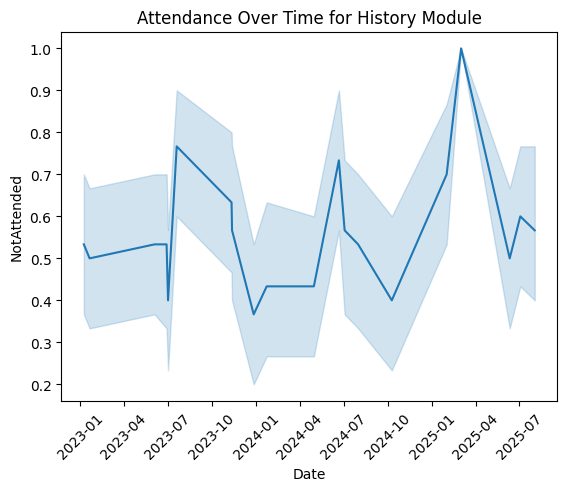

In [112]:
# your code here

# filtering data frame for a specific module name (History) 
module = 'History'
module_df = df_clean[df_clean['Module Name'] == module]
module_df

#plot to show attendance over time for History Module 
sns.lineplot(data=module_df, x='Date', y='NotAttended')
plt.title('Attendance Over Time for History Module')
plt.xticks(rotation=45)

7. **[For L6 students only]** Add a column, titled "Student Overall Attendance", with the average attendance for the student. Add a column, titled "Standardised Student Overall Attendance", with the z-scores of "Student Overall Attendance".

In [113]:
#Calcuting average attendance per student
student_attendance_avg = (module_df.groupby("Person Code")["NotAttended"].mean().reset_index())
# Adding in new column 
student_attendance_avg.rename(columns={"NotAttended": "Student Overall Attendance"}, inplace=True)
#Calcutlating standardised attendance
student_attendance_avg["Standardised Student Overall Attendance"] = (student_attendance_avg["Student Overall Attendance"] - student_attendance_avg["Student Overall Attendance"].mean())/ student_attendance_avg["Student Overall Attendance"].std()
# Merging new columns to module_df
module_df = module_df.merge(student_attendance_avg, on="Person Code", how="left")
module_df

,Person Code,Module Code,Year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Postive Marks,NotAttended,Attendance Code,Student Overall Attendance,Standardised Student Overall Attendance
0,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A,0.05,-2.212854
1,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A,0.05,-2.212854
2,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A,0.05,-2.212854
3,280,1266,2025,Lim,Michael,History,295,726,735,2025-08-02,N,0,0,A,0.05,-2.212854
4,280,1266,2023,Lim,Michael,History,295,726,271,2023-07-02,N,0,0,A,0.05,-2.212854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,416,1266,2025,Rossi,Daniel,History,846,658,457,2025-07-03,Y,1,1,P,0.75,0.794909
596,346,1266,2025,Reddy,Hana,History,846,880,457,2025-07-03,Y,1,1,L,0.40,-0.708973
597,160,1266,2025,Nair,Lisa,History,846,418,457,2025-07-03,N,0,0,A,0.70,0.580068
598,160,1266,2023,Nair,Lisa,History,846,418,776,2023-12-27,Y,1,1,P,0.70,0.580068


✅ **Checkpoint:** Cleaned DataFrame and a line or bar plot of attendance over time for one module.

---



### **Exercise 3 — Make it Shiny**



1. Create a file called `app.py`.
2. Build a minimal Shiny app that only displays the plot you created in the previous exercise.
3. Run the app locally using this terminal command:

   ```bash
   shiny run --reload --launch-browser app.py
   ```
   > if your terminal is not in the same folder where the `app.py` file is, you will need to specify the correct path, e.g. `shiny run --reload --launch-browser /path/to/my/app.py`

4. **[For L6 students only]** Enhance the app with a title and at least one more UI element. E.g., you could enhance the app with interactivity (e.g. allow the user to select the module to plot).

✅ **Checkpoint:** The app runs without errors and displays the plot from Exercise 2 in a browser.

---

Came across issues with developing shiny 

### **Exercise 4 — Comparing Modules**



1. Compute the **mean** and **standard deviation** of attendance per module using pandas `groupby`. Consult the documentation if needed.


In [114]:
# your code here
#Calculating mean and standard deviation based on how students did not attend per module
df_clean.groupby("Module Name")["NotAttended"].agg(['mean', 'std'])


,mean,std
Module Name,,
Algorithms,0.756140,0.429597
Arabic,0.773414,0.418939
Arts & Crafts,0.620301,0.486227
Biology,0.631250,0.483222
Biomedical Engineering,0.650000,0.483046
Business Intelligence,0.794872,0.406409
Chemistry,0.691667,0.462448
Cloud Computing,0.854255,0.353038
Creative Writing,0.967105,0.178951


2. Create a `seaborn.barplot` of mean attendance per module with 95% confidence intervals.


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, 'Nursing'),
  Text(1, 0, 'Italian'),
  Text(2, 0, 'History'),
  Text(3, 0, 'Arabic'),
  Text(4, 0, 'Database Design'),
  Text(5, 0, 'Spanish'),
  Text(6, 0, 'Journalism'),
  Text(7, 0, 'International Business'),
  Text(8, 0, 'Project Management'),
  Text(9, 0, 'Algorithms'),
  Text(10, 0, 'System Administration'),
  Text(11, 0, 'Public Speaking'),
  Text(12, 0, 'Cloud Computing'),
  Text(13, 0, 'English Literature'),
  Text(14, 0, 'Cybersecurity'),
  Text(15, 0, 'Discrete Mathematics'),
  Text(16, 0, 'Linguistics'),
  Text(17, 0, 'French'),
  Text(18, 0, 'Music Theory'),
  Text(19, 0, 'Religious Studies'),
  Text(20, 0, 'Marketing'),
  Text(21, 0, 'User Experience Design'),
  Text(22, 0,

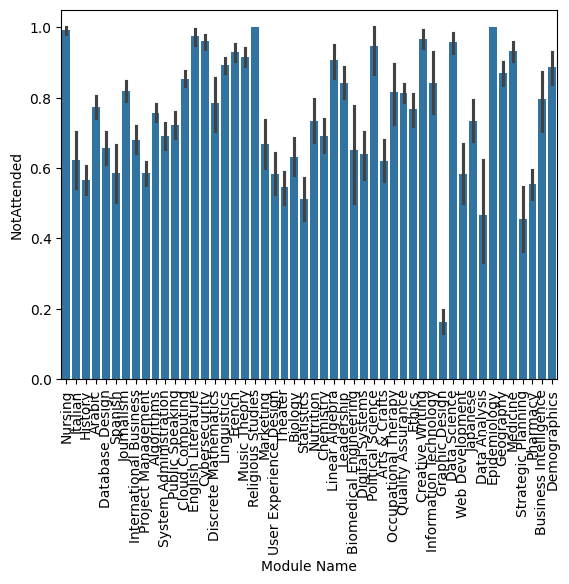

In [ ]:
# your code here
sns.barplot(data=df_clean, x='Module Name', y='NotAttended')
plt.xticks(rotation=90)

3. Write a short interpretation (2–3 sentences) explaining what the plot and error bars show.

    The bar plot shows the mean attendance for every module within the dataset. The higher the bar, the higher the attendance; this is vice versa for how low the bar is. The error bars indicate the uncertaintly of each module to the attendnace rate within the dataset. 


✅ **Checkpoint:** My notebook and/or my Shiny app show a barplot with error bars, one bar per module (x-axis), where the height of the bar is the module's attendance rate (y-axis).

---



### **Exercise 5 — Attendance Relationships**



1. Answer the question: **Do students with low overall attendance tend to attend modules that have low attendance?**.

2. **[For L5 students only]**. Choose between a correlation analysis or a linear regression analysis to answer the question.

3. **[For L6 students only]** Run both correlation analysis and linear regression analysis to answer the same question. Do they tell the same story?

> Tips:
> 1. Compute the mean attendance rate of each module. Can you re-use some of the `groupby` code you wrote above?
> 2. For each module, compute the average overall attendance of the students who attended that module.
> 3. Correlation and linear regression can both help you answer the question. 
> 4. Report main statistic and p-value(s).


In [ ]:
# Your code here    
#Calcuting average attendance per student
student_attendance_avg = (df_clean.groupby("Person Code")["NotAttended"].mean().reset_index())
# Adding in new column 
student_attendance_avg.rename(columns={"NotAttended": "Student Overall Attendance"}, inplace=True)
#Calcutlating standardised attendance
student_attendance_avg["Standardised Student Overall Attendance"] = (student_attendance_avg["Student Overall Attendance"] - student_attendance_avg["Student Overall Attendance"].mean())/ student_attendance_avg["Student Overall Attendance"].std()
# Merging new columns to module_df
df_clean1 = df_clean.merge(student_attendance_avg, on="Person Code", how="left")
df_clean1

,Person Code,Module Code,Year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Postive Marks,NotAttended,Attendance Code,Student Overall Attendance,Standardised Student Overall Attendance
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O,0.875000,0.463306
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A,0.875000,0.463306
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A,0.216216,-2.716740
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A,0.216216,-2.716740
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A,0.216216,-2.716740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048,28,1867,2025,Ben-Khalil,Kojo,Project Management,788,974,544,2025-05-25,N,0,0,A,0.550265,-1.104240
17049,375,1867,2025,Becker,Tariq,Project Management,788,860,544,2025-05-25,Y,1,1,P,0.973118,0.936937
17050,407,1867,2025,Kumar,Thomas,Project Management,788,15,432,2025-02-16,N,0,0,A,0.776596,-0.011706
17051,18,1867,2023,Durand,Charles,Project Management,788,376,693,2023-10-01,Y,1,1,P,0.978610,0.963444


In [129]:
new_df = df_clean1[["Person Code", "Module Name", "Student Overall Attendance"]].drop_duplicates()
new_df

student_attendance_avgM = (new_df.groupby("Module Name")["Student Overall Attendance"].mean().reset_index())
student_attendance_avgM

,Module Name,Student Overall Attendance
0,Algorithms,0.726994
1,Arabic,0.668323
2,Arts & Crafts,0.720928
3,Biology,0.656349
4,Biomedical Engineering,0.701747
5,Business Intelligence,0.774378
6,Chemistry,0.712633
7,Cloud Computing,0.726994
8,Creative Writing,0.797730
9,Cybersecurity,0.932405


In [117]:
# your code here
# mean attendance rate of each module 
df_m_std = df_clean.groupby("Module Name")["NotAttended"].agg(['mean'])
df_m_std

#average overall attendance for each module



,mean
Module Name,
Algorithms,0.756140
Arabic,0.773414
Arts & Crafts,0.620301
Biology,0.631250
Biomedical Engineering,0.650000
Business Intelligence,0.794872
Chemistry,0.691667
Cloud Computing,0.854255
Creative Writing,0.967105


In [131]:
df_merge = df_m_std.merge(student_attendance_avgM, on="Module Name", how="left")
df_merge


,Module Name,mean,Student Overall Attendance
0,Algorithms,0.756140,0.726994
1,Arabic,0.773414,0.668323
2,Arts & Crafts,0.620301,0.720928
3,Biology,0.631250,0.656349
4,Biomedical Engineering,0.650000,0.701747
5,Business Intelligence,0.794872,0.774378
6,Chemistry,0.691667,0.712633
7,Cloud Computing,0.854255,0.726994
8,Creative Writing,0.967105,0.797730
9,Cybersecurity,0.960123,0.932405


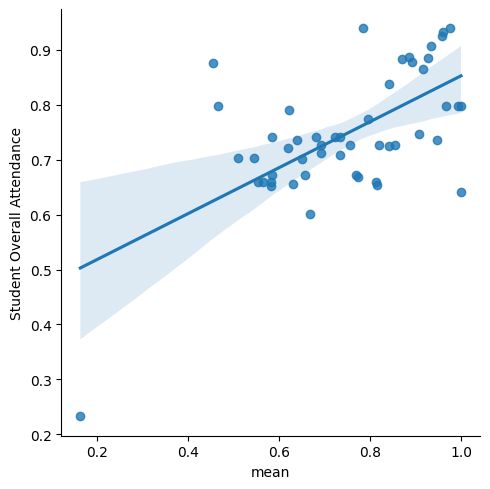

In [132]:
sns.lmplot(data=df_merge, x="mean", y="Student Overall Attendance")


In [133]:
df_merge[["mean", "Student Overall Attendance"]].corr()


,mean,Student Overall Attendance
mean,1.00000,0.62453
Student Overall Attendance,0.62453,1.00000


The linear regression graph reflects a postive relationshipm between the average module attendance (mean) and overall student attendance. Student attendance increases in line with module attendance. Similarly, the correlation coeffiecnt (0.62) reflects this, suggesting the corelation between overall stsudent attendance and the module attendance is moderately high.

✅ **Checkpoint:** Table or printout showing correlation or regression results.

# THE END!